In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Wczytanie danych z https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=1677542400&interval=1d&events=history&includeAdjustedClose=true')
df = df[['Date', 'Close']]

# Normalizacja danych
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Podział danych na zbiór treningowy i testowy
prediction_days = 60
train_data = scaled_data[:-prediction_days] # = [len(scaled_data) - prediction_days]
test_data = scaled_data[-prediction_days:]

# Przygotowanie danych treningowych
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
train_data

array([[[0.00295417],
        [0.00292874],
        [0.00309905],
        ...,
        [0.00295002],
        [0.00292697],
        [0.00282342]],

       [[0.00292874],
        [0.00309905],
        [0.00304965],
        ...,
        [0.00292697],
        [0.00282342],
        [0.00284272]],

       [[0.00309905],
        [0.00304965],
        [0.00292288],
        ...,
        [0.00282342],
        [0.00284272],
        [0.00294328]],

       ...,

       [[0.30628823],
        [0.30357453],
        [0.30149955],
        ...,
        [0.24727999],
        [0.24843476],
        [0.24542786]],

       [[0.30357453],
        [0.30149955],
        [0.30134374],
        ...,
        [0.24843476],
        [0.24542786],
        [0.2429853 ]],

       [[0.30149955],
        [0.30134374],
        [0.29650956],
        ...,
        [0.24542786],
        [0.2429853 ],
        [0.24431741]]])

In [4]:

# Zbudowanie modelu LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20, batch_size=32)


Metal device set to: Apple M1


2023-03-08 15:09:00.403356: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-08 15:09:00.403930: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-03-08 15:09:01.568180: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-08 15:09:04.047446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-08 15:09:04.372090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-08 15:09:04.689916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-08 15:09:04.859935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-08 15:09:05.109163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-08 15:09:05.490283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114

93/93 [==============================] - 10s 61ms/step - loss: 0.0075
Epoch 2/50
93/93 [==============================] - 5s 53ms/step - loss: 0.0015
Epoch 3/50
93/93 [==============================] - 5s 57ms/step - loss: 0.0014
Epoch 4/50
93/93 [==============================] - 5s 58ms/step - loss: 0.0011
Epoch 5/50
93/93 [==============================] - 6s 60ms/step - loss: 9.6587e-04
Epoch 6/50
93/93 [==============================] - 6s 59ms/step - loss: 9.8996e-04
Epoch 7/50
93/93 [==============================] - 5s 55ms/step - loss: 9.1145e-04
Epoch 8/50
93/93 [==============================] - 5s 52ms/step - loss: 8.7581e-04
Epoch 9/50
93/93 [==============================] - 5s 53ms/step - loss: 6.8017e-04
Epoch 10/50
93/93 [==============================] - 5s 51ms/step - loss: 6.0372e-04
Epoch 11/50
93/93 [==============================] - 5s 50ms/step - loss: 6.2814e-04
Epoch 12/50
93/93 [==============================] - 5s 53ms/step - loss: 5.6448e-04
Epoch 13/50
93/

2/2 [==============================] - 0s 82ms/step


/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_29370/4253388606.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_closing_price
/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_29370/4253388606.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = pd.to_datetime(df['Date'][:-prediction_days])
/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_29370/4253388606.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy

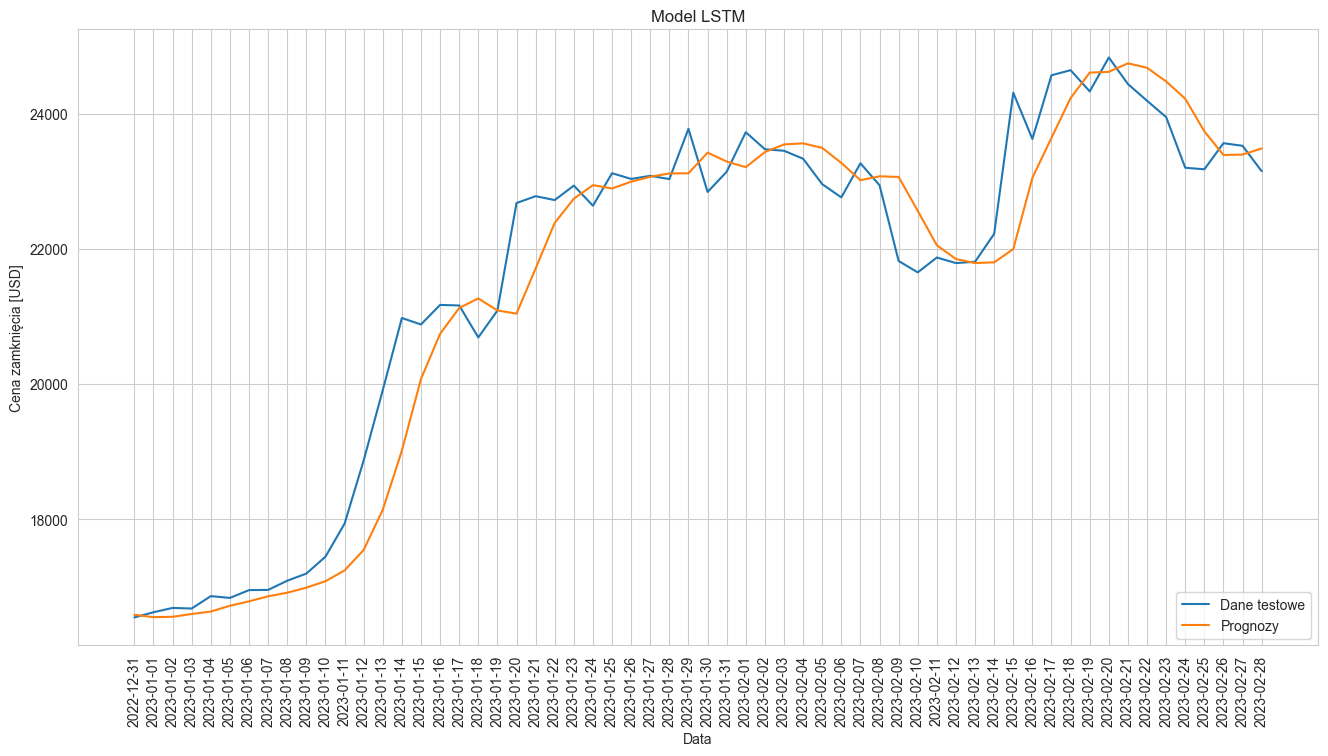

3016    16586.445312
3017    16552.080078
3018    16557.458984
3019    16598.796875
3020    16635.029297
3021    16720.820312
3022    16786.302734
3023    16860.427734
3024    16913.595703
3025    16988.556641
3026    17083.939453
3027    17242.683594
3028    17546.353516
3029    18139.960938
3030    19015.714844
3031    20074.521484
3032    20742.902344
3033    21124.445312
3034    21265.826172
3035    21087.669922
3036    21040.685547
3037    21709.392578
3038    22383.859375
3039    22740.595703
3040    22941.222656
3041    22891.615234
3042    22992.333984
3043    23064.855469
3044    23114.341797
3045    23116.455078
3046    23421.439453
3047    23290.318359
3048    23206.587891
3049    23430.390625
3050    23542.992188
3051    23559.009766
3052    23491.732422
3053    23269.693359
3054    23014.056641
3055    23071.630859
3056    23062.312500
3057    22560.164062
3058    22051.779297
3059    21848.396484
3060    21788.410156
3061    21799.501953
3062    21996.218750
3063    23050

In [7]:

# Przygotowanie danych testowych
inputs = df[len(df) - len(test_data) - 60:]['Close'].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predykcja
predicted_closing_price = model.predict(X_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

# Wykres
import matplotlib.pyplot as plt

train = df[:-prediction_days]
valid = df[-prediction_days:]
valid['Predictions'] = predicted_closing_price
train['Date'] = pd.to_datetime(df['Date'][:-prediction_days])
valid['Date'] = pd.to_datetime(df['Date'][-prediction_days:])

startFrom = 3500
plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia [USD]')
# plt.plot(train['Date'][startFrom:], train['Close'][startFrom:])
plt.plot(valid['Date'], valid[['Close']])
plt.plot(valid['Date'], valid[['Predictions']])
plt.legend([ 'Dane testowe', 'Prognozy'], loc='lower right')
plt.xticks(valid['Date'][::1], rotation=90)
plt.show()

valid['Predictions']

In [62]:
# inputs[1, 0]

x_pred = [23320.347656]
x_pred = np.array(x_pred)
x_pred = np.reshape(x_pred, (x_pred.shape[0], 1, 1))

# Predykcja
y_pred = model.predict(x_pred)
y_pred = scaler.inverse_transform(y_pred)
y_pred


1/1 [==============================] - 0s 115ms/step


array([[159299.2]], dtype=float32)

In [53]:
x_pred

array(23873.222656)